<a href="https://colab.research.google.com/github/auroravicks/ML_Projects/blob/main/ML_Prac_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
df=pd.read_csv('/content/Bank Churn Modelling.csv')
df=df.drop('CustomerId',axis=1)
df=df.drop('Surname',axis=1)
df=df.drop('Geography',axis=1)
df=df.drop('Gender',axis=1)
X=df.drop('Churn',axis=1)
y=df['Churn']
print(X.shape,y.shape)
#preprocessing

(10000, 8) (10000,)


In [3]:
df.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#logistic regression
from sklearn import linear_model

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X =pd.DataFrame(sc_x.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)


In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 7,penalty='l2',solver='liblinear',max_iter=200,C=0.015)
classifier.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_train, y_pred))

Confusion Matrix : 
 [[7169    0]
 [   0 1831]]
Accuracy :  0.8071111111111111


In [6]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[773  21]
 [175  31]]
Accuracy :  0.804


In [7]:
y_pred.shape

(1000,)

In [8]:
X_train.shape

(9000, 8)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(8,)),  # Specify the input shape as a tuple
    tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(16, activation=tf.nn.leaky_relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Corrected loss function

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                576       
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
282/282 [==============================] - 3s 4ms/step - loss: 0.7167 - accuracy: 0.7784
Epoch 2/25
282/282 [==============================] - 2s 5ms/step - loss: 0.4971 - accuracy: 0.8220
Epoch 3/25
282/282 [==============================] - 1s 4ms/step - loss: 0.4494 - accuracy: 0.8364
Epoch 4/25
282/282 [==============================] - 1s 3ms/step - loss: 0.4294 - accuracy: 0.8449
Epoch 5/25
282/282 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8476
Epoch 6/25
282/282 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8514
Epoch 7/25
282/282 [==============================] - 1s 4ms/step - loss: 0.4117 - accuracy: 0.8500
Epoch 8/25
282/282 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8517
Epoch 9/25
282/282 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8516
Epoch 10/25
282/282 [==============================] - 1s 4ms/step - loss: 0.4049 - accuracy: 0.8517

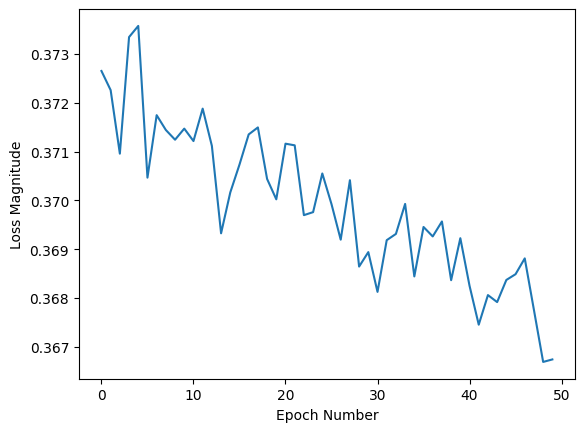

In [25]:
h=model.fit(X_train, y_train, epochs=50, verbose=False)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(h.history['loss'])